# Spam SMS Detection using Machine Learning 📱🛡️

---

## 1️⃣ Install & Import Required Libraries

In this section, we will:
- Install the **imblearn** library (used for handling imbalanced datasets).
- Import essential Python libraries for:
  - Data Manipulation (pandas, numpy)
  - Text Preprocessing (re, nltk stopwords)
  - Feature Extraction (TfidfVectorizer)
  - Machine Learning Algorithms (Naive Bayes)
  - Data Splitting & Evaluation Metrics
  - Handling Class Imbalance (SMOTE)
  - Saving Trained Model (joblib)

---


In [1]:
# Install imblearn if not installed
!pip install imblearn

# Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---
## 📝 Notes:
- **imblearn (SMOTE):** Synthetic Minority Over-sampling Technique to balance the dataset.
- **nltk stopwords:** Common words (like "is", "the", "and") which will be removed from SMS text.
- **Multinomial Naive Bayes (MNB):** Effective for text classification tasks.
---


# 2️⃣ Load and Preview Dataset 📄

In this step, we will:
- Load the **Spam SMS Dataset (CSV file)**.
- Select only the required columns:
  - **v1** → Label (Spam/Ham)
  - **v2** → Message (Text content)
- Rename the columns for better readability:
  - `v1` → `Label`
  - `v2` → `Message`
- Display the **first 5 rows** to preview the data.

> **Note:** Ensure the CSV file is in the correct path. Adjust `'spam.csv'` path if needed.


In [2]:
# Load Dataset (Adjust Path if Needed)
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['Label', 'Message']
df.head()


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


---
## 📝 Notes:
- The dataset contains two columns:
  - **Label**: Indicates whether the message is 'spam' or 'ham' (not spam).
  - **Message**: The actual SMS text.
- The CSV file may contain extra columns; we select only the necessary two.
---


# 3️⃣ Text Preprocessing & Cleaning 🧹

In this step, we will:
- Load a list of **English stopwords** using **NLTK**.
- Define a **data cleaning function** that will:
  1. Convert text to **lowercase**.
  2. Remove all **non-alphabetic characters** (digits, symbols, etc.).
  3. Split text into words and **remove stopwords** (common useless words like 'the', 'is', 'and').
- Apply this cleaning function to all SMS messages in the dataset.
- Preview the cleaned dataset.

---


In [3]:
# Stopwords List
stop = stopwords.words('english')

# Data Cleaning Function
def data_cleaning(text):
    text = str(text).lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    imp_words = [w for w in words if w not in stop]
    return ' '.join(imp_words)

# Apply Cleaning
df['Message'] = df['Message'].apply(data_cleaning)
df.head()


,Label,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


---
## 📝 Notes:
- **Stopwords Removal**: Helps to eliminate words that don't add value to spam detection.
- **Regex Cleaning**: We retain only alphabetic characters to simplify text analysis.
- This step is crucial to improve the performance of text vectorization (TF-IDF) later.
---


# 4️⃣ Feature & Label Separation 🎯

In this step, we will:
- Separate the dataset into **features (X)** and **labels (y)**.
  - **X** → SMS Message (Text Data)
  - **y** → Label (Spam/Ham)
- Encode the labels using **LabelEncoder**:
  - 'ham' → 0
  - 'spam' → 1

Label encoding is essential to convert categorical labels into numeric values that can be processed by Machine Learning models.

---


In [4]:
# Separate Features & Labels
X = df['Message']
y = df['Label']

# Encode Labels (ham/spam to 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


---
## 📝 Notes:
- **Feature (X):** The cleaned SMS message text.
- **Label (y):** Whether the message is spam or ham.
- **LabelEncoder:** Automatically assigns numeric values to categorical labels.
  - For example:
    - 'ham' → 0
    - 'spam' → 1
---


# 5️⃣ Text Feature Extraction using TF-IDF ✨

In this step, we will:
- Convert SMS text data into **numerical feature vectors** using **TF-IDF Vectorization**.
- Use **n-grams (1,2)** to capture both **single words (unigrams)** and **pairs of consecutive words (bigrams)**.
- Limit the total number of features to **5000** to reduce dimensionality.

TF-IDF (Term Frequency-Inverse Document Frequency) helps quantify the importance of words in a document relative to the entire dataset.

---


In [5]:
# TF-IDF Vectorization with N-Grams
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_vectors = tfidf.fit_transform(X)


---
## 📝 Notes:
- **ngram_range=(1,2):** This allows the model to consider individual words and combinations of two words.
- **max_features=5000:** Keeps only the top 5000 most important words/phrases based on frequency.
- TF-IDF ensures that common words across all messages get lower importance while rare but important words get higher scores.
- The result is a **sparse matrix (X_vectors)** representing each message numerically.
---


# 6️⃣ Handling Class Imbalance using SMOTE ⚖️

In this step, we will:
- Address the **class imbalance problem** (where ham messages outnumber spam messages) using **SMOTE (Synthetic Minority Over-sampling Technique)**.
- SMOTE generates synthetic samples of the minority class (spam) to balance the dataset.
- This helps the model learn better and prevents bias towards the majority class.

---


In [6]:
# Apply SMOTE to Balance Dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectors, y_encoded)


---
## 📝 Notes:
- **SMOTE** works by creating synthetic examples of the minority class instead of duplicating existing ones.
- Balancing the dataset is crucial for improving model performance, especially in real-world spam detection tasks.
- After this step:
  - The number of spam and ham messages in the training data becomes approximately equal.
---


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

---
## 📝 Notes:
- **SMOTE** works by creating synthetic examples of the minority class instead of duplicating existing ones.
- Balancing the dataset is crucial for improving model performance, especially in real-world spam detection tasks.
- After this step:
  - The number of spam and ham messages in the training data becomes approximately equal.
---


# 7️⃣ Model Evaluation 🧪📊

In this step, we will:
- Use the trained machine learning model to **predict labels** on the test dataset.
- Evaluate the model’s performance using:
  - **Accuracy Score**: Measures overall correctness.
  - **Confusion Matrix**: Provides detailed insight into correct and incorrect classifications (True Positives, False Positives, etc.).
  - **Classification Report**: Shows Precision, Recall, F1-Score for both Spam and Ham classes.

---


In [8]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9819
Confusion Matrix:
 [[963  22]
 [ 13 932]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       985
           1       0.98      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



---
## 📝 Notes:
- **Accuracy:** The proportion of correctly predicted messages (spam and ham) over total messages.
- **Confusion Matrix Breakdown:**
  - **True Positives (TP):** Correctly predicted spam messages.
  - **True Negatives (TN):** Correctly predicted ham messages.
  - **False Positives (FP):** Ham messages incorrectly predicted as spam.
  - **False Negatives (FN):** Spam messages incorrectly predicted as ham.
- **Classification Report:**
  - **Precision**: Correct positive predictions out of all positive predictions.
  - **Recall**: Correct positive predictions out of actual positives.
  - **F1-Score**: Harmonic mean of precision and recall.
---


# 8️⃣ Visualizing Confusion Matrix using Heatmap 🖼️

In this step, we will:
- Visualize the **Confusion Matrix** using a **Seaborn heatmap** to better understand the model’s performance.
- This graphical representation helps to quickly identify the number of correct and incorrect predictions for both **Spam** and **Ham** messages.

---


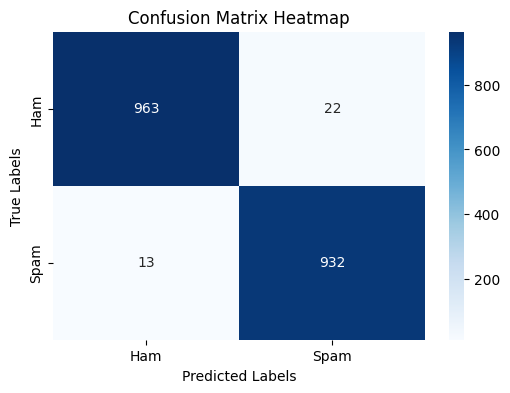

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Actual confusion matrix values
cm = [[963, 22],
      [13, 932]]

labels = ['Ham', 'Spam']

# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


---
## 📝 Notes:
- **Blue Cells:** Represent counts of predictions.
- **Diagonal Cells:** Correct predictions (True Positives & True Negatives).
- **Off-diagonal Cells:** Incorrect predictions (False Positives & False Negatives).
- Visual heatmaps make it easier to communicate model performance to non-technical stakeholders.
---


# 9️⃣ Saving Model & Preprocessing Objects 💾

In this final step, we will:
- Save the trained **TF-IDF Vectorizer**, **Spam Classifier Model**, and **Label Encoder** as `.pkl` files.
- This will allow us to reuse these objects later for predictions without needing to retrain the model.
- We use **joblib** for efficient serialization of large numpy arrays (like TF-IDF matrices).

---


In [10]:
# Save TF-IDF Vectorizer, Model, and Label Encoder
import pickle

# Save TF-IDF Vectorizer using pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save Spam Classifier Model using pickle
with open('spam_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save Label Encoder using pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)



---
## 📝 Notes:
- **tfidf_vectorizer.pkl:** Contains the TF-IDF model used to convert SMS text into numerical vectors.
- **spam_classifier_model.pkl:** The trained machine learning model for classifying messages.
- **label_encoder.pkl:** Used to encode/decode labels (ham/spam) between text and numeric form.
- These files can be loaded in future scripts, web apps (e.g., Streamlit), or APIs for real-time predictions.
---
